In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
image_generator = ImageDataGenerator(rescale = 1./255., validation_split = 0.2)

In [3]:
train_generator = image_generator.flow_from_directory(batch_size = 32,
                                                     directory="train",
                                                     shuffle  = True,
                                                     target_size=(48,48),
                                                     class_mode='categorical')


validation_generator = image_generator.flow_from_directory(batch_size = 32,
                                                           directory = "validation", 
                                                           shuffle = True, 
                                                           target_size = (48,48), 
                                                           class_mode = 'categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


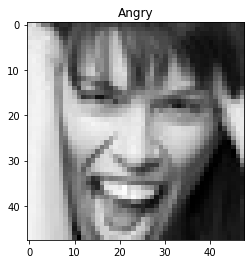

In [4]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [14]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

In [18]:
history=model.fit(train_generator,
                steps_per_epoch=28821//32,
                epochs=5,
                validation_data=validation_generator,
                validation_steps=7066//32)

Epoch 1/5
900/900 [==============================] - 95s 106ms/step - loss: 1.3837 - accuracy: 0.4629 - val_loss: 1.2883 - val_accuracy: 0.5080
Epoch 2/5
900/900 [==============================] - 90s 100ms/step - loss: 1.2919 - accuracy: 0.5002 - val_loss: 1.2177 - val_accuracy: 0.5369
Epoch 3/5
900/900 [==============================] - 90s 100ms/step - loss: 1.2260 - accuracy: 0.5307 - val_loss: 1.2113 - val_accuracy: 0.5419
Epoch 4/5
900/900 [==============================] - 91s 101ms/step - loss: 1.1767 - accuracy: 0.5493 - val_loss: 1.1820 - val_accuracy: 0.5511
Epoch 5/5
900/900 [==============================] - 93s 103ms/step - loss: 1.1363 - accuracy: 0.5667 - val_loss: 1.1747 - val_accuracy: 0.5587


### note :we use just 5 epochs, we have/can use more , (like 50 or 30 )

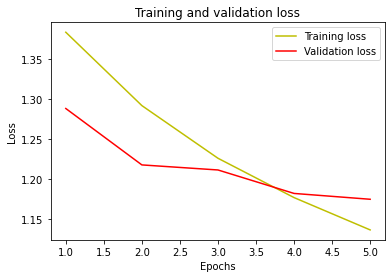

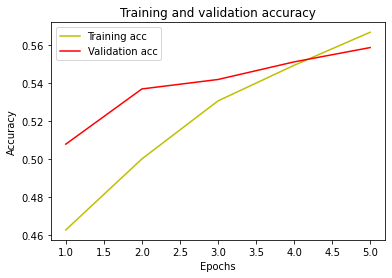

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
test_img, test_lbl = validation_generator.__next__()
predictions=model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [24]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.46875


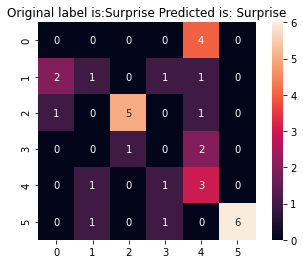

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

Dataset from: https://www.kaggle.com/msambare/fer2013